# MGTA 613 - Deep Learning Project - Image Classification

# Introduction

Alzheimer's disease poses a formidable challenge to global healthcare, impacting millions and significantly straining medical systems. Early detection and intervention are pivotal in managing its progression, yet the disease's subtle nature complicates diagnosis. Traditional diagnostic methods, including MRI scans, are crucial for their detailed brain imaging capabilities. However, the complexity of MRI data demands advanced analytical techniques for accurate interpretation.

This project proposes to leverage deep learning to create a sophisticated model for classifying MRI images for Alzheimer's detection. Deep learning's ability to identify complex patterns invisible to the human eye aims to significantly enhance diagnostic precision, speed up the diagnosis process, and ultimately, improve outcomes for patients. By integrating AI with healthcare, this initiative offers a new horizon for effectively tackling the urgent need for accurate and timely Alzheimer's diagnosis, bringing hope to affected individuals and their families.


# Case Description

Implementing deep learning for Alzheimer's diagnosis via MRI image analysis targets critical challenges in healthcare. The subtlet onset of of Alzheimer’s and its symptom overlap with other dementias makes early and accurate diagnosis difficult. Current methods are often invasive, expensive, and rely on scarce specialized expertise. Additionally, the vast MRI data available in clinical settings is underleveraged, despite its potential for revealing early diagnostic indicators through advanced analytics like deep learning.

# Business Implementation

## Technical and Business Constraints

**Data Privacy and Security:** Privacy and security of patient data, especially when dealing with sensitive MRI images is essential. Compliance with regulations in Canada and US adds layers of complexity in data handling and processing.

**Data Standardization and Quality:** MRI images come from various sources and machines, leading to inconsistencies in data quality and format. Creating a model that can accurately interpret such diverse data sets requires advanced preprocessing and standardization techniques.

**Cost and Funding:** Developing, testing, and deploying AI-based diagnostic systems require significant investment in research and development, computing resources, and skilled personnel. Securing adequate funding and managing operational costs is a major concern.

**Regulatory Approval and Compliance:** Gaining regulatory approval for medical AI applications is a lengthy and complex process as it involves testing for accuracy, safety, and efficacy.

## System Components

**Data Preprocessing Module:** Data preprocessing module is a major component that standardizes and cleans MRI images. This ensures they are all in uniform format and quality for analysis.

**Deep Learning Model:** The core of the solution is the deep learning model, which inolved developing a neural network capable of analyzing MRI images to detect early signs of Alzheimer’s disease.

## Required Resources

**MRI Image Datasets:** Labeled labeled datasets of MRI images, including those of patients at various stages of Alzheimer's disease is an core aspect which will be crucial for training and testing the deep learning model.

**High-Performance Computing Power:** Training and running deep learning models will be computationally intensive and expensive. This will require cloud-based services or dedicated on-premise GPUs and CPUs.

## Operational Plan

To launch our Alzheimer's diagnosis solution, we'll start by gathering a specialized team in AI and diverse MRI datasets to develop and refine a deep learning model. After ensuring it meets clinical standards and obtaining regulatory approval, we'll deploy the system in pilot settings, focusing on integration with healthcare IT and training for professionals. Continuous support and updates will be provided based on feedback and performance, leading to improvements and broader deployment.

# Set-up

One of the initial steps in any deep learning project is preparing your dataset. This involves organizing your data in a way that a model can learn from it. In our case, we're dealing with images for an Alzheimer's disease classification project. Our goal is to teach a computer to recognize different stages of Alzheimer's disease from brain scan images. To do this, we need to perform a few steps to get our images ready for training.

We will be using a Kaggle dataset called ["Alzheimer's Dataset ( 4 class of Images)"](https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images). This is an open sourcecd database by Kaggle that was hand colleccted from various website with each and every labels verified.

In [1]:
# Upload Kaggle API Key (kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adamdingds","key":"2c49a07f3f4891e1d494741aa8c417db"}'}

In [2]:
# Downloading the dataset directly from Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images
!unzip -qq alzheimers-dataset-4-class-of-images.zip

 97% 33.0M/34.1M [00:02<00:00, 15.5MB/s]
100% 34.1M/34.1M [00:02<00:00, 12.2MB/s]


In [3]:
# Import necessary libraries and modules
import os  # Provides functions to interact with the operating system
import numpy as np  # Fundamental package for scientific computing in Python
import tensorflow as tf  # Import TensorFlow for machine learning and neural networks
from tensorflow import keras  # High-level neural networks API running on top of TensorFlow
from collections import Counter  # A container to count hashable objects
from tensorflow.keras import layers, models, optimizers, Input  # Import specific modules from keras
from tensorflow.keras.models import Sequential  # For linear stacking of layers
from tensorflow.keras.layers import Dense, Flatten, Dropout  # Import layers for building the model
from tensorflow.keras.applications import ResNet50  # Pre-trained model for deep learning applications
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations

# Print the version of TensorFlow to ensure compatibility
print(tf.__version__)


2.15.0


Setting global variables is a good programming practice. This keeps the code clean and makes it easier if you want to adjust the parameters. There is also no change you accidentally miss typing a variable value.

In [4]:
# Define global variables for model configuration
BATCH_SIZE = 32  # Number of samples per gradient update
IMAGE_SIZE = [176, 208]  # Dimensions to which the images will be resized
SHAPE = [176, 208, 3]  # Shape of the input images including the channel (RGB)
SEED = 999  # Set seed for reproducibility
tf.random.set_seed(SEED)  # Set seed for TensorFlow to ensure reproducibility in TensorFlow operations
np.random.seed(SEED)  # Set seed for NumPy to ensure reproducibility in NumPy operations

# Load the Data

We use TensorFlow's image_dataset_from_directory function to automatically load images from directories and prepare them for training. Here's how it works for each dataset:

    main_directory/
      class1/
        class1_images
      class2/
        class2_images
      class3/
        class3_images
      class4/
        class4_images

Training Dataset
The training dataset is the bulk of our data, which the model learns from. We specify the path to our images, how much of the data to reserve for validation (20% in this case), and that this particular dataset is for training. We also set the image size, batch size, label mode (to treat our labels as integers), and shuffle the data to ensure the model doesn't learn any order-specific patterns.

Validation Dataset
The validation dataset is a subset of the data not used for training but for periodically checking the model's performance during training. This helps us tune the model's parameters without biasing its performance. The setup is similar to the training dataset, but we specify that we're creating a validation subset.

Test Dataset
Finally, the test dataset is completely separate from the training and validation data. It's used to evaluate the model's performance after training is complete. This gives us an idea of how well the model might perform in the real world.


In [5]:
# Create training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Alzheimer_s Dataset/train",  # Path to the training data directory
    validation_split=0.2,  # Reserve 20% of the data for validation
    subset="training",  # Specify that this dataset is for training
    seed=SEED,  # Seed for random number generator for reproducibility
    image_size=IMAGE_SIZE,  # Target size of the images
    batch_size=BATCH_SIZE,  # Number of samples per batch
    label_mode='int',  # Labels are returned as integers
    shuffle=True,  # Shuffle the data
)

# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Alzheimer_s Dataset/train",  # Path is same as training since we're splitting it
    validation_split=0.2,  # Reserve 20% of the data for validation
    subset="validation",  # Specify that this dataset is for validation
    seed=SEED,  # Seed for reproducibility
    image_size=IMAGE_SIZE,  # Target size of the images
    batch_size=BATCH_SIZE,  # Number of samples per batch
    label_mode='int',  # Labels are returned as integers
)

# Create test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Alzheimer_s Dataset/test",  # Path to the test data directory
    image_size=IMAGE_SIZE,  # Target size of the images
    batch_size=BATCH_SIZE,  # Number of samples per batch
    label_mode='int',  # Labels are returned as integers
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.
Found 1279 files belonging to 4 classes.


The dataset contains 4 classes, 'MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia'. We will rename the class names in our dataset. Dementia is the general term for a decline in memory, reasoning or other thinking skills.

In [6]:
# Define the class names for the dataset
class_names = ['MildDementia', 'ModerateDementia',
               'NonDementia', 'VeryMildDementia']

# Calculate the number of classes
num_classes = len(class_names)

# Assign the custom class names to the datasets
train_ds.class_names = class_names
val_ds.class_names = class_names
test_ds.class_names = class_names

# Understanding the Dataset

Let's take a closer at the images, this allows us to grasp what our model is using as input and confirming the accuracy of our image loading process.

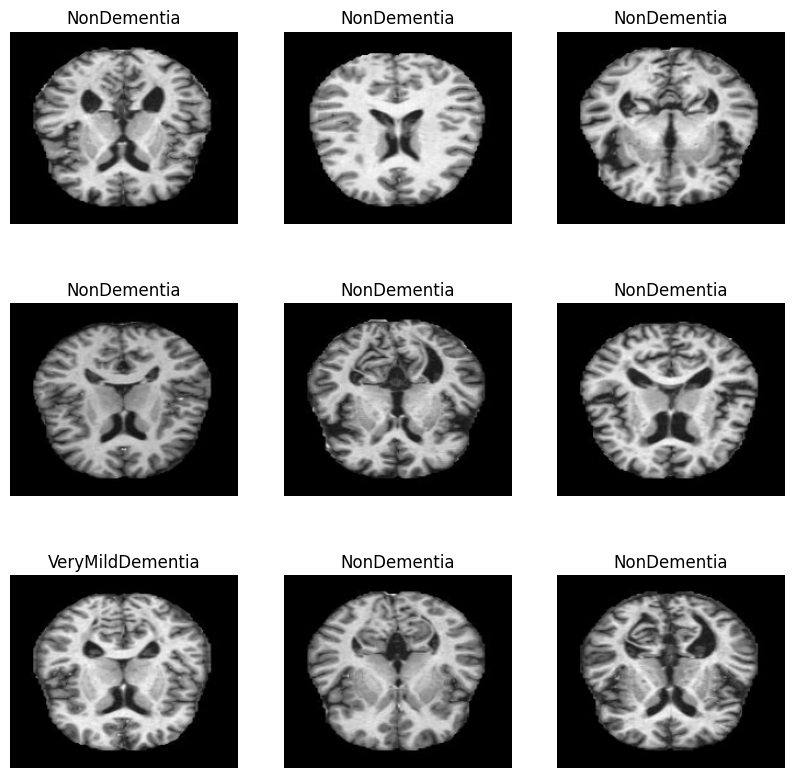

In [7]:
# Visualizing the first batch from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

Let's also take a look at how many pictures we have in our dataset. It turns out we have a lot more pictures of Very Mild Dementia and Non-Dementia than other types. So, most of our pictures are from these two categories, and we don't have many pictures of actual dementia.


In [8]:
# Function to count images in each class for a dataset
def count_images(dataset):
    class_counts = Counter()
    for images, labels in dataset:
        class_counts.update(labels.numpy())
    return dict(class_counts)

# Count the images in each class for each dataset
train_class_counts = count_images(train_ds)
val_class_counts = count_images(val_ds)
test_class_counts = count_images(test_ds)

# Function to print counts with class names
def print_class_counts(class_counts, class_names):
    for class_index, count in class_counts.items():
        print(f"{class_names[class_index]}: {count}")

# Print the counts for the training dataset
print("Training dataset class counts:")
print_class_counts(train_class_counts, class_names)

# Print the counts for the validation dataset
print("\nValidation dataset class counts:")
print_class_counts(val_class_counts, class_names)

# Print the counts for the test dataset
print("\nTest dataset class counts:")
print_class_counts(test_class_counts, class_names)

Training dataset class counts:
NonDementia: 2027
VeryMildDementia: 1451
MildDementia: 575
ModerateDementia: 44

Validation dataset class counts:
NonDementia: 533
VeryMildDementia: 341
MildDementia: 142
ModerateDementia: 8

Test dataset class counts:
MildDementia: 179
NonDementia: 640
VeryMildDementia: 448
ModerateDementia: 12


# Feature Engineering

The dataset we are working with are catgegorical data. We will use a preprocessing step call one-hot encoding. One-hot encoding transforms each class label into a binary vector with a '1' in the position corresponding to the class and '0's elsewhere. This format is crucial for the model to correctly interpret the categories without assuming any ordinal relationship between them.



In [9]:
# Function to convert labels to one-hot encoding
def one_hot_label(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

# Apply the function to the dataset
train_ds = train_ds.map(one_hot_label)
val_ds = val_ds.map(one_hot_label)
test_ds = test_ds.map(one_hot_label)

## Approach 1: Artificial Neural Network (ANN)

Artificial Neural Networks (ANNs) are computational models inspired by the structure and function of the human brain. They consist of interconnected nodes, or artificial neurons, organized into layers. Information flows through the network, with each neuron processing input and producing an output based on learned patterns.

We will use ANN as a simple approach to the problem. It will only include dense layers.

Model Architecture
 - Input Layer: Utilizes a Flatten layer to transform the input images into a 1D array. This is necessary because dense layers require input in a flat vector form. The input_shape is specified to match the shape of our preprocessed images.
 - Hidden Layers: Two dense layers follow, with 128 and 64 neurons, respectively, each using the ReLU (Rectified Linear Unit) activation function. These layers are the core of the model, where the learning from input features happens.
 - Output Layer: The final layer has 4 neurons, corresponding to the 4 classes of Alzheimer's disease stages we aim to predict. The softmax activation function is used here to produce a probability distribution over the classes, facilitating classification.

In [10]:
# Create a simple Artificial Neural Network (ANN)
ann_model = models.Sequential([
    layers.Flatten(input_shape=SHAPE),  # Input layer with flattened input shape
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'), # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(4, activation='softmax') # Output layer with 4 neurons (for 4 classes) and softmax activation
])

# Compile the model
ann_model.compile(optimizer='rmsprop',  # Root Mean Square Propagation optimizer
              loss='categorical_crossentropy',  # Categorical cross-entropy loss function
              metrics=['accuracy'])  # Accuracy metric for evaluation

# Train the model
ann_history = ann_model.fit(train_ds,
                    epochs=30,
                    validation_data=val_ds)

Epoch 1/30
129/129 [==============================] - 3s 10ms/step - loss: 3606.9707 - accuracy: 0.4118 - val_loss: 2967.4536 - val_accuracy: 0.1387
Epoch 2/30
129/129 [==============================] - 1s 8ms/step - loss: 466.5047 - accuracy: 0.4057 - val_loss: 64.6080 - val_accuracy: 0.4297
Epoch 3/30
129/129 [==============================] - 1s 8ms/step - loss: 18.4586 - accuracy: 0.3698 - val_loss: 1.2697 - val_accuracy: 0.3330
Epoch 4/30
129/129 [==============================] - 1s 8ms/step - loss: 1.2068 - accuracy: 0.4879 - val_loss: 1.1252 - val_accuracy: 0.5205
Epoch 5/30
129/129 [==============================] - 1s 8ms/step - loss: 1.0895 - accuracy: 0.4948 - val_loss: 1.0434 - val_accuracy: 0.5205
Epoch 6/30
129/129 [==============================] - 1s 8ms/step - loss: 1.0509 - accuracy: 0.4948 - val_loss: 1.0254 - val_accuracy: 0.5205
Epoch 7/30
129/129 [==============================] - 1s 8ms/step - loss: 1.0429 - accuracy: 0.4948 - val_loss: 1.0210 - val_accuracy: 0.

In [11]:
# Evaluate on the test set
test_loss, test_accuracy = ann_model.evaluate(test_ds)
print("Test Accuracy:", test_accuracy)

40/40 [==============================] - 0s 6ms/step - loss: 1.5539 - accuracy: 0.4996
Test Accuracy: 0.4996090829372406


The performance of the ANN model was suboptimal, with an accuracy around 50%. This basic approach has room for improvement and is just the starting point, so we will now explore more advanced techniques.

# Approach 2: Convolutional Neural Network (CNN)

## Baseline Convolutional Neural Network

A Convolutional Neural Network (CNN) is a specialized type of artificial neural network tailored for processing visual data, notably images. It comprises various layers, such as convolutional layers, pooling layers, and fully connected layers, enabling it to automatically extract hierarchical features from images. These features range from basic elements like edges and shapes to more complex ones such as object components and entire objects.

Base CNN model (influenced by "Deep Learning with Python" by Francois Chollet):

1. Input Layer: The input layer is defined with a shape specified by the constant SHAPE.

2. Rescaling Layer: Pixel values are rescaled to the range [0, 1] using the Rescaling layer.

3. Convolutional Layers: Multiple Conv2D layers are added, each applying a set of filters to the input image to extract features. Each Conv2D layer has a specified number of filters, kernel size, and ReLU activation function.

4. MaxPooling Layers: After each convolutional layer, MaxPooling2D layers are added to downsample the feature maps, reducing computational complexity.

5. Flatten Layer: The output of the last convolutional layer is flattened into a 1D tensor using the Flatten layer.

6. Dropout Layer: A Dropout layer is included with a dropout rate of 0.5 to prevent overfitting by randomly dropping out neurons during training.

7. Output Layer: Finally, a Dense output layer with softmax activation is added. This layer produces class probabilities for the 4 classes in the dataset.

**Paper Research** - ["Prediction of Alzheimer's disease from magnetic resonance imaging using a convolutional neural network"](https://www.sciencedirect.com/science/article/pii/S2666521223000054#abs0010) by Kevin de Silva and Holger Kunz [1]- This paper demonstrated the effectiveness of using convolutional neural networks (CNNs) for Alzheimer's disease (AD) diagnosis from MRI images. The key results highlighted the superior performance of CNNs in AD classification compared to conventional methods such as a combination of clinical assessments / neuropsychological testing, MRI / CT / PET scans and cerebrospinal fluid analysis .

The following CNN model and various processes are based off the book "Deep Learning with Python, Second Edition" by François Chollet [2]. With a primary focus of chapter 8 in computer vision.

In [12]:
# Define the input layer
inputs = keras.Input(shape=SHAPE)

# Preprocess the input data
x = layers.Rescaling(1./255)(inputs)  # Rescale pixel values to [0, 1]

# First convolutional layer
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)  # Convolutional layer with 32 filters and ReLU activation
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling layer with a pool size of 2

# Second convolutional layer
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling layer with a pool size of 2

# Third convolutional layer
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling layer with a pool size of 2

# Fourth convolutional layer
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling layer with a pool size of 2

# Fifth convolutional layer
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten the output to a 1D tensor
x = layers.Flatten()(x)

# Apply dropout regularization
x = layers.Dropout(0.5)(x)  # Dropout layer with a dropout rate of 0.5

# Output layer
outputs = layers.Dense(4, activation="softmax")(x)  # Output layer with 4 neurons (for 4 classes) and softmax activation

# Instantiate the model
cnn_model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
cnn_model.summary()  # Summary of the model's architecture

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 176, 208, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 176, 208, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 174, 206, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 87, 103, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 101, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 50, 64)        0         
 g2D)                                                        

From the model summary, we can see the initial input is [(None, 176, 208, 3)]. However, as layers progress, the model intricately extracts and refines features from input images. Initially, convolutional layers detect basic patterns, such as edges and textures. Through subsequent layers, these basic patterns are combined to identify more complex features. Max pooling layers reduce dimensionality, focusing on prominent features and reducing computational load. Finally, the network flattens the outputs and uses dense layers to classify the image into categories, with dropout layers preventing over-reliance on specific features to reduce overfitting. The final output becomes (None, 4) which is our 4 classes.

The model is compiled with categorical cross-entropy as the loss function, the RMSprop optimizer, and accuracy as the evaluation metric. This prepares the model for training on image classification tasks.
 - Categorical Cross-Entropy Loss: Used for multi-class classification and tells the model how wrong its guesses are when classifying images (given the model feedback).
 - RMSprop Optimizer: Adjusting how fast or slow the model learns from its mistakes. It helps the model learn better and avoid getting stuck.
 - Accuracy Metric: Tells us how often the model gets the right answer. We want this number to be as high as possible, so we can trust the model's predictions.

In [14]:
# Compile the model specifying the loss function, optimizer, and metrics to monitor
cnn_model.compile(
    loss="categorical_crossentropy",  # Use categorical cross-entropy for multi-class classification
    optimizer="rmsprop",  # RMSprop optimizer adapts learning rates for faster convergence
    metrics=["accuracy"]  # Track accuracy during training and validation
)

**keras.callbacks.ModelCheckpoint:** Saves the model at certain checkpoints during training, allowing you to keep track of the best-performing model. Here, it's configured to save only the model with the lowest validation loss (save_best_only=True), and it monitors validation loss (monitor="val_loss") to determine when to save the model. This helps prevent overfitting by preserving the best model according to performance on the validation set.

**cnn_model.fit:** Trains the CNN model (cnn_model) using the specified settings. It trains the model on the training dataset (train_ds) for a total of 50 epochs (epochs=50), validating its performance on the validation dataset (val_ds). Additionally, it applies the defined callbacks during training to enhance the training process.

In [15]:
# Define callbacks to enhance training
callbacks = [
    keras.callbacks.ModelCheckpoint(  # Callback to save the model
        filepath="base_cnn.keras",  # Path where the model is saved
        save_best_only=True,  # Save only the best model according to validation loss
        monitor="val_loss"  # Monitor validation loss to determine the best model
    )
]

# Execute the model training with the defined settings and callbacks
cnn_history = cnn_model.fit(
    train_ds,  # Training dataset
    epochs=50,  # Number of epochs to train for
    validation_data=val_ds,  # Validation dataset to evaluate performance
    callbacks=callbacks  # List of callbacks to apply during training
)

Epoch 1/50
129/129 [==============================] - 7s 18ms/step - loss: 1.0926 - accuracy: 0.4740 - val_loss: 1.0284 - val_accuracy: 0.5205
Epoch 2/50
129/129 [==============================] - 2s 13ms/step - loss: 1.0355 - accuracy: 0.4984 - val_loss: 1.1767 - val_accuracy: 0.3770
Epoch 3/50
129/129 [==============================] - 2s 13ms/step - loss: 0.9523 - accuracy: 0.5521 - val_loss: 1.0750 - val_accuracy: 0.5029
Epoch 4/50
129/129 [==============================] - 2s 13ms/step - loss: 0.8752 - accuracy: 0.5997 - val_loss: 1.1631 - val_accuracy: 0.5586
Epoch 5/50
129/129 [==============================] - 2s 14ms/step - loss: 0.7715 - accuracy: 0.6529 - val_loss: 0.7302 - val_accuracy: 0.6641
Epoch 6/50
129/129 [==============================] - 2s 13ms/step - loss: 0.6340 - accuracy: 0.7198 - val_loss: 0.7749 - val_accuracy: 0.6572
Epoch 7/50
129/129 [==============================] - 2s 13ms/step - loss: 0.4791 - accuracy: 0.8033 - val_loss: 1.2328 - val_accuracy: 0.5469

Let's plot the graphs for training and validation accuracy, as well as the graphs for training and validation loss. By analyzing these graphs, we can assess the performance of the model and determine whether it's overfitting, underfitting, or fitting well to the data.

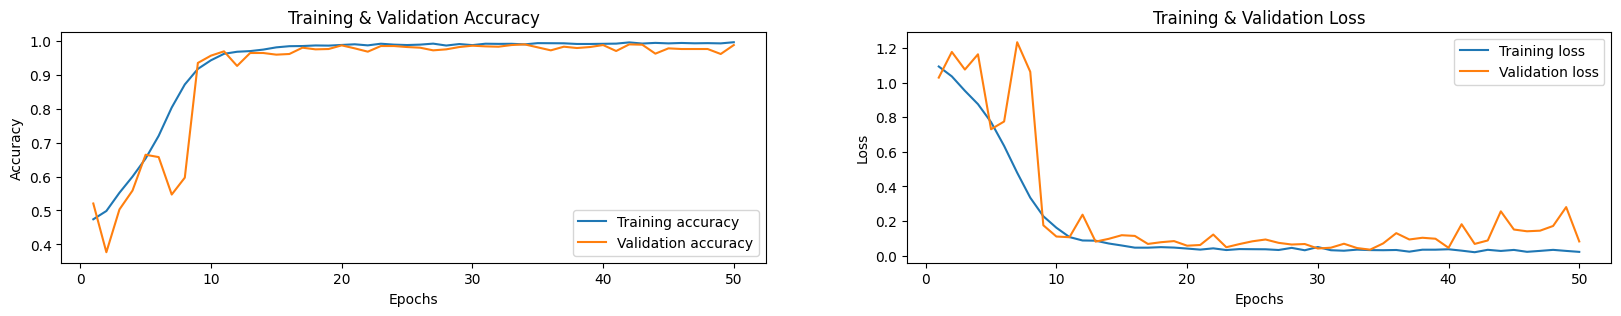

In [16]:
metrics = ['accuracy', 'loss']  # List of metrics to plot
epochs = range(1, len(cnn_history.history['accuracy']) + 1)

# Create a figure with subplots for each metric
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()  # Flatten the axis array for easy iteration

for i, met in enumerate(metrics):
    # Plot training metric
    ax[i].plot(epochs, cnn_history.history[met], label=f"Training {met}")
    # Plot validation metric
    ax[i].plot(epochs, cnn_history.history[f"val_{met}"], label=f"Validation {met}")
    ax[i].set_title(f'Training & Validation {met.capitalize()}')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel(met.capitalize())
    ax[i].legend()

plt.show()

In [17]:
# Load the best model from the checkpoint and evaluate on the test dataset
test_model = keras.models.load_model("base_cnn.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

40/40 [==============================] - 1s 14ms/step - loss: 2.4702 - accuracy: 0.6810
Test accuracy: 0.681


**Training & Validation Accuracy:**

Both training and validation accuracy appear to follow a similar trend with the validation accuracy closely tracking the training accuracy. The curves are almost overlapping which indicates that the model is generalizing well to the validation data. This is a characteristic of a good fit.


**Training & Validation Loss:**

The training loss decreases steadily which is expected. The validation loss, after initially decreasing, shows some fluctuations. The model does not appear to be overfitting or underfitting significantly. The consistent gap between training and validation loss indicates that the model generalizes well. However, the fluctuations in validation loss suggest there might be some variability in the model's performance on the validation set.

Overall, these plots suggest that the model is neither overfitting nor underfitting significantly, and it appears to be a good fit for the data it has been trained and validated on. Our testing accuracy with CNN of 68% is significantly higher than the simple ANN model.

## Baseline CNN + Data Augmentation

Overfitting occurs when a machine learning model learns to capture and memorize the noise or random fluctuations in the training data, rather than identifying the underlying patterns that generalize well to new, unseen data. In other words, the model becomes too complex relative to the amount and quality of the training data, leading it to perform well on the training set but poorly on new data.

There are several reasons why overfitting occurs:

1. Model Complexity: A highly complex model with many parameters can learn to fit the training data very closely, including its noise and outliers.

2. Limited Data: If the training dataset is small or unrepresentative of the true distribution of the data, the model may mistakenly learn patterns that are specific to the training examples rather than generalizable ones.

3.  Noise in the Data: Random variations or errors in the training data can mislead the model into learning patterns that do not exist in the underlying data distribution.

Data augmentation is a technique used to mitigate overfitting by artificially expanding the training dataset. This involves creating new training examples from the existing ones by applying a variety of transformations that preserve the essential characteristics of the data. For example, in the case of image data, data augmentation techniques may include:

1. Rotation: Rotating images by a certain angle.

2. Flipping: Mirroring images horizontally or vertically.

3. Scaling: Resizing images to different dimensions.

4. Translation: Shifting images horizontally or vertically.

5. Brightness adjustment: Increasing or decreasing the brightness of images.

By augmenting the training data with these variations, the model is exposed to a more diverse range of examples, which helps it to generalize better to unseen data. Data augmentation effectively makes the model more robust by reducing its reliance on specific training examples and capturing more of the underlying patterns in the data distribution. This can lead to improved performance and reduced overfitting.

With data augmentation, an important thing to beware of is over augmentating the data, as this would also lead to increased noise and overfit the model. We will be using a simple data augmentation with just horizontal flips, rotations and zoom as we do not want to over augment our dataset.

In [18]:
# Create a data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        # Randomly flip input images horizontally
        layers.RandomFlip("horizontal", input_shape=SHAPE),

        # Randomly rotate input images by a fraction of the full rotation angle
        layers.RandomRotation(0.1),

        # Randomly zoom into or out of input images by a factor
        layers.RandomZoom(0.2),
    ]
)

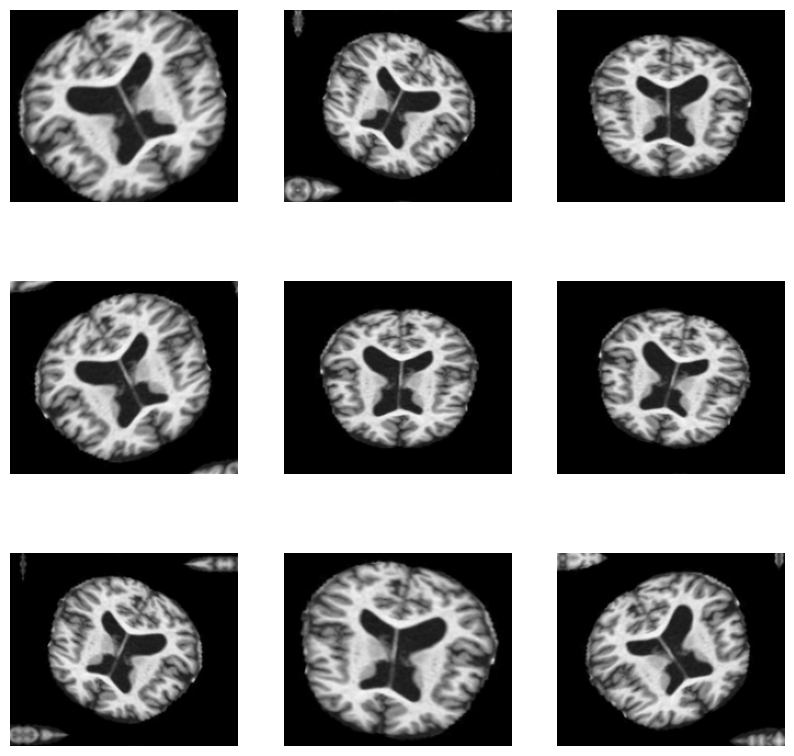

In [19]:
# View Data Augmented Images
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

We'll maintain all the existing components of the baseline Convolutional Neural Network (CNN) model unchanged. The sole adjustment we'll introduce is the incorporation of data augmentation directly into the input images. This means that prior to being fed into the model for training, all images will undergo augmentation.

In [20]:
# Same model but with augmentation applied as first layer
inputs = keras.Input(shape=SHAPE)
x = data_augmentation(inputs)   # applying data augmentation to input images
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)

cnn_aug = keras.Model(inputs=inputs, outputs=outputs)

# compile model
cnn_aug.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="cnn_aug.keras",
        save_best_only=True,
        monitor="val_loss")
]

cnn_aug_history = cnn_aug.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/100
129/129 [==============================] - 4s 17ms/step - loss: 1.1295 - accuracy: 0.4760 - val_loss: 1.1539 - val_accuracy: 0.5205
Epoch 2/100
129/129 [==============================] - 2s 15ms/step - loss: 1.0535 - accuracy: 0.4847 - val_loss: 1.0602 - val_accuracy: 0.3330
Epoch 3/100
129/129 [==============================] - 2s 15ms/step - loss: 1.0350 - accuracy: 0.4908 - val_loss: 1.2268 - val_accuracy: 0.5205
Epoch 4/100
129/129 [==============================] - 2s 15ms/step - loss: 0.9830 - accuracy: 0.5223 - val_loss: 0.8835 - val_accuracy: 0.5781
Epoch 5/100
129/129 [==============================] - 2s 15ms/step - loss: 0.9460 - accuracy: 0.5367 - val_loss: 0.9604 - val_accuracy: 0.5352
Epoch 6/100
129/129 [==============================] - 2s 15ms/step - loss: 0.9351 - accuracy: 0.5431 - val_loss: 0.9188 - val_accuracy: 0.5352
Epoch 7/100
129/129 [==============================] - 2s 15ms/step - loss: 0.9256 - accuracy: 0.5453 - val_loss: 1.0678 - val_accuracy:

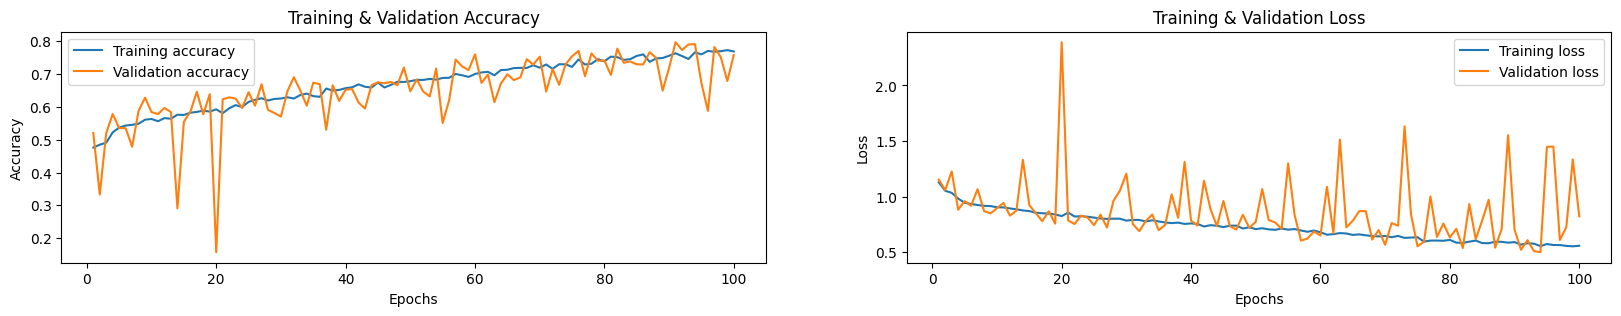

40/40 [==============================] - 1s 8ms/step - loss: 0.9463 - accuracy: 0.6638
Test accuracy: 0.664


In [22]:
metrics = ['accuracy', 'loss']  # List of metrics to plot
epochs = range(1, len(cnn_aug_history.history['accuracy']) + 1)

# Create a figure with subplots for each metric
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()  # Flatten the axis array for easy iteration

for i, met in enumerate(metrics):
    # Plot training metric
    ax[i].plot(epochs, cnn_aug_history.history[met], label=f"Training {met}")
    # Plot validation metric
    ax[i].plot(epochs, cnn_aug_history.history[f"val_{met}"], label=f"Validation {met}")
    ax[i].set_title(f'Training & Validation {met.capitalize()}')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel(met.capitalize())
    ax[i].legend()

plt.show()

test_model = keras.models.load_model("cnn_aug.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

**Training & Validation Accuracy:**
The training accuracy is consistently increasing over time with with the validation accuracy displaying more variability. Despite the fluctuations, the validation accuracy does not appear to be decreasing over time relative to the training accuracy. Based on the gap between the training and validation accuracy, it suggests that the model could be overfitting slightly.

**Training & Validation Loss:**
There's a noticeable difference between the training and validation loss. The validation loss is quite volatile and generally higher than the training loss. The large fluctuations in the validation indicates that the model is having difficulty generalizing to the validation set, which is a sign of overfitting.

Overall, these plots suggest that the model may be overfitting to the training data. This is backedup by the gap between training and validation accuracy and the high variability in validation loss. The accuracy for the data augmentation model is around 66% and is similar to the result from CNN model without augmentation. The main reason for this is due to the imbalance of images between classes. The imbalance creates a bias towards the majority class while the minority classes are underrepresented.


## Transfer Learning using ResNet50

Transfer learning is a machine learning technique where a model trained on one task is reused as the starting point for a model on a second related task. In the context of Convolutional Neural Networks (CNNs), transfer learning involves taking a pre-trained CNN model, typically trained on a large dataset like ImageNet, and adapting it to a new task or dataset.

 Advantages of Using Transfer Learning with CNN:
  - **Utilization of Pre-trained Features:** CNN models trained on large datasets are able to extract generic features including low-level patterns (e.g., edges, textures) and high-level concepts (e.g., shapes, objects) which are useful for a wide range of image-related tasks. Transfer learning leverages these pre-trained features which saves time and computational resources required to learn them from scratch.
  - **Reduced Training Data Requirement:** Training deep neural networks such as CNNs usually requires a large amount of labeled data to achieve good results. However, labeled data are hard or expensive to acquire in the real world. Transfer learning overcomes this limitation by fine-tuning a pre-trained model on a smaller dataset specific to the new task.
  - **Faster Training:** Training a CNN from scratch is time-consuming and computationally intensive. Transfer learning uses a pre-trained model which significantly reduce training time and resources since the model has already learned basic image features.

Paper Research - ["Brain MRI Analysis for Alzheimer’s Disease Diagnosis Using CNN-Based Feature Extraction and Machine Learning"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9025443/) by Duaa AlSaeed and Samar Fouad Omar [3] -
This study proposed a deep learning approach using a pre-trained CNN model, ResNet50, for automatic feature extraction in AD diagnosis from MRI images. The key result was the higher accuracy achieved by the CNN model compared to conventional classifiers such as Softmax, SVM, and RF. I want to be able to replicate their high accuracy and performaced based on the ResNet50 pre-trained model.

In [23]:
# Load the ResNet50 model
conv_base = ResNet50(
    weights='imagenet',  # Use pre-trained ImageNet weights
    include_top=False,  # Do not include the top layer to allow for a custom classifier
    input_shape=SHAPE)  # Specify the input shape of the images

# Set the ResNet50 base model to be not trainable
conv_base.trainable = False  # This freezes the weights of the pre-trained ResNet50 model

94765736/94765736 [==============================] - 5s 0us/step


In [24]:
# Define the model
inputs = keras.Input(shape=SHAPE)  # Define the input shape
x = data_augmentation(inputs)  # Apply data augmentation to the input images
x = keras.applications.resnet50.preprocess_input(x)  # Preprocess input images for ResNet50
x = conv_base(x, training=False)  # Pass the preprocessed input through the ResNet50 base model
x = layers.Flatten()(x)  # Flatten the output of the base model
x = layers.Dense(256, activation='relu')(x)  # Add a dense layer with ReLU activation
x = layers.Dropout(0.5)(x)  # Apply dropout regularization
outputs = layers.Dense(4, activation='softmax')(x)  # Output layer with softmax activation for classification
TL_model = keras.Model(inputs, outputs)  # Create the transfer learning model

# Compile the model
TL_model.compile(loss='categorical_crossentropy',  # Use categorical crossentropy loss
              optimizer='rmsprop',  # Use RMSprop optimizer
              metrics=['accuracy'])  # Track accuracy metric during training

In [25]:
# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="transfer_learning.h5",
        save_best_only=True,
        monitor="val_loss")
]

TL_history = TL_model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/50
129/129 [==============================] - ETA: 0s - loss: 10.9722 - accuracy: 0.4672

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/129 [==============================] - 10s 46ms/step - loss: 10.9722 - accuracy: 0.4672 - val_loss: 1.0095 - val_accuracy: 0.5205
Epoch 2/50
129/129 [==============================] - 5s 35ms/step - loss: 1.2895 - accuracy: 0.4921 - val_loss: 0.9474 - val_accuracy: 0.5205
Epoch 3/50
129/129 [==============================] - 4s 28ms/step - loss: 1.1759 - accuracy: 0.4928 - val_loss: 1.0569 - val_accuracy: 0.3203
Epoch 4/50
129/129 [==============================] - 4s 28ms/step - loss: 1.1239 - accuracy: 0.4874 - val_loss: 1.0311 - val_accuracy: 0.5205
Epoch 5/50
129/129 [==============================] - 5s 35ms/step - loss: 1.0803 - accuracy: 0.4948 - val_loss: 0.9164 - val_accuracy: 0.5205
Epoch 6/50
129/129 [==============================] - 5s 35ms/step - loss: 1.0626 - accuracy: 0.4943 - val_loss: 0.9061 - val_accuracy: 0.5205
Epoch 7/50
129/129 [==============================] - 5s 35ms/step - loss: 1.0517 - accuracy: 0.4948 - val_loss: 0.8984 - val_accuracy: 0.5205
Epoch 8/

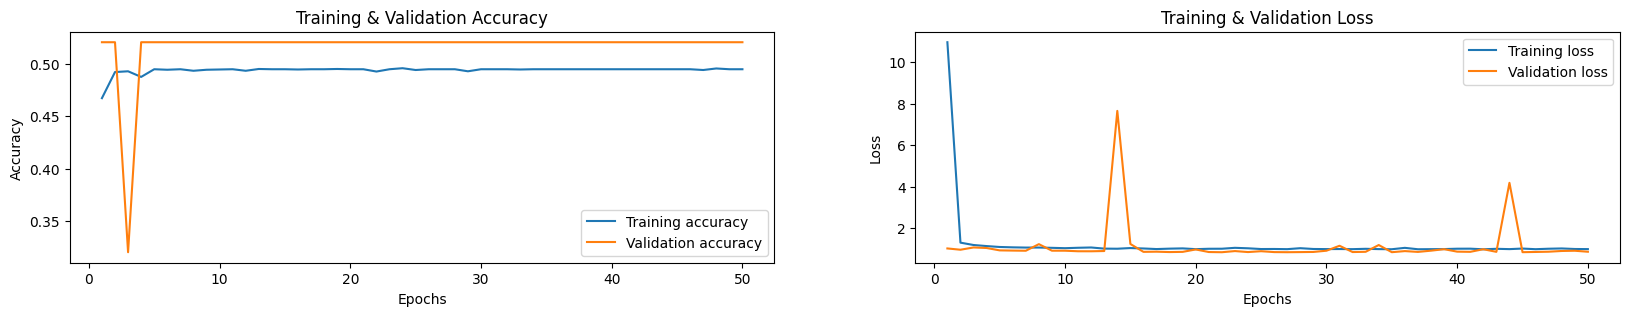

40/40 [==============================] - 2s 33ms/step - loss: 0.9706 - accuracy: 0.5004
Test accuracy: 0.500


In [26]:
metrics = ['accuracy', 'loss']  # List of metrics to plot
epochs = range(1, len(TL_history.history['accuracy']) + 1)

# Create a figure with subplots for each metric
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()  # Flatten the axis array for easy iteration

for i, met in enumerate(metrics):
    # Plot training metric
    ax[i].plot(epochs, TL_history.history[met], label=f"Training {met}")
    # Plot validation metric
    ax[i].plot(epochs, TL_history.history[f"val_{met}"], label=f"Validation {met}")
    ax[i].set_title(f'Training & Validation {met.capitalize()}')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel(met.capitalize())
    ax[i].legend()

plt.show()

test_model = keras.models.load_model("transfer_learning.h5")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

There is a huge gap between the training and validation accuracy with the validation accuract being higher than the training accuracy. This suggests overfitting, as the model memorizes the training data but fails to generalize to unseen examples.

Validation loss and training loss converge closely on a graph, indicating that the model is generalizing well to unseen data.

The test accuracy is 50% which is worse than CNN model with and without augmentation. Given the graph, the transfer learning model is overfitting.

## CNN with Adaptive Learning Rate and Early Stopping

To improve our original / baseline CNN model, we're adopting techniques from a successful Kaggle entry. This includes adjusting the learning rate dynamically during training and stopping training early when the model stops improving. These measures help prevent overfitting, ensuring our model converges optimally without unnecessary training epochs.

The following code was influenced by [Kaggle](https://www.kaggle.com/code/amyjang/alzheimer-mri-model-tensorflow-2-3-data-loading) [4]. We will implement the adaptive learning rate and early stopping mechanism to prevent overfitting. We will be using the baseline CNN model.

In [27]:
# Create a CNN model
inputs = keras.Input(shape=SHAPE)
x = layers.Rescaling(1./255)(inputs)  # Rescale pixel values to [0, 1]
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)  # Convolutional layer with 32 filters and ReLU activation
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling layer with a pool size of 2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)  #
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)  # Flatten the output to a 1D tensor
x = layers.Dropout(0.5)(x)  # Dropout layer with a dropout rate of 0.5
outputs = layers.Dense(4, activation="softmax")(x)  # Output layer with 4 neurons (for 4 classes) and softmax activation
adaptiveLR_model = keras.Model(inputs=inputs, outputs=outputs)

adaptiveLR_model.compile(
        optimizer='rmsprop',
        loss="categorical_crossentropy",
        metrics=['accuracy']
    )

In [28]:
# Define a function that exponentially decays the learning rate based on the epoch
# The learning rate starts at lr0 and decays by a factor of 0.1 every s epochs
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

# Create an instance of the exponential decay function with lr0 = 0.01 and s = 20
exponential_decay_fn = exponential_decay(0.01, 20)

# Define a learning rate scheduler callback that will adjust the learning rate based on the epoch number using exponential decay
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# Define a model checkpoint callback
# This callback will save the model's weights to "alzheimer_model.h5" file whenever the validation loss improves
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("adaptiveLR_model.h5",
                                                    save_best_only=True)

# Define an early stopping callback that stops training if there's no improvement in the validation loss for 10 consecutive epochs
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True) # restore the best weights of the model before stopping

In [29]:
# Train the model
history = adaptiveLR_model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],  # List of callbacks to be applied during training
    epochs=100  # Number of epochs for training
)

Epoch 1/100
129/129 [==============================] - 3s 15ms/step - loss: 64.7079 - accuracy: 0.4635 - val_loss: 1.0822 - val_accuracy: 0.3330 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 2s 13ms/step - loss: 1.0515 - accuracy: 0.4818 - val_loss: 1.0858 - val_accuracy: 0.3330 - lr: 0.0089
Epoch 3/100
129/129 [==============================] - 2s 14ms/step - loss: 1.0488 - accuracy: 0.4869 - val_loss: 1.0471 - val_accuracy: 0.5205 - lr: 0.0079
Epoch 4/100
129/129 [==============================] - 2s 14ms/step - loss: 1.0462 - accuracy: 0.4948 - val_loss: 1.0189 - val_accuracy: 0.5205 - lr: 0.0071
Epoch 5/100
129/129 [==============================] - 2s 13ms/step - loss: 1.0449 - accuracy: 0.4948 - val_loss: 1.0198 - val_accuracy: 0.5205 - lr: 0.0063
Epoch 6/100
129/129 [==============================] - 2s 13ms/step - loss: 1.0449 - accuracy: 0.4948 - val_loss: 1.0400 - val_accuracy: 0.5205 - lr: 0.0056
Epoch 7/100
129/129 [==============================] - 2s

40/40 [==============================] - 0s 8ms/step - loss: 1.0334 - accuracy: 0.5004


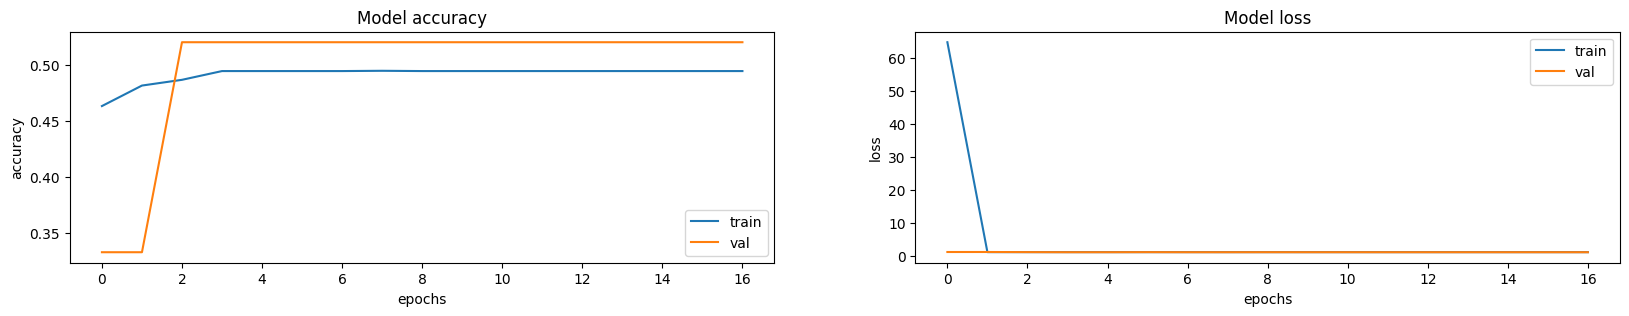

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

_ = adaptiveLR_model.evaluate(test_ds)

In the accuracy plot, validation accuracy is larger than the train accuracy. This is unusual and is potentially udnerfitting or that the validation set is not representative of the complexity found in the training set.

In the loss plot, the training loss decreases quickly and then flattens out which is expected. The validation loss is flat and low from the start which is unsual.

The main reason for the weird behavior of accuracy and loss might be due to using adaptive learning rate since it adjusts the process for convergence. Thus the training process might converge prematurely.

# Conclusion


## Results & Discussions

In this project, we explored the effectiveness of different neural network architectures for image classification tasks, including a simple Artificial Neural Network (ANN) and a more advanced deep learning architecture, the Convolutional Neural Network (CNN). The ANN, composed of a few dense layers, achieved a testing accuracy of around 50%. This performance aligns with expectations, as ANNs are generally not optimized for image classification due to their lack of spatial hierarchy understanding. In contrast, our baseline CNN model outperformed the ANN, reaching a testing accuracy between 65-70%.

To further refine and enhance the CNN's performance, we implemented three additional strategies: data augmentation, transfer learning and manual adaptive learning rate / early stoppage. Data augmentation is used to diversify our dataset, introducing more image variations to train on, while transfer learning leveraged a pretrained model to tranfer generic feature. Adaptive LR and early stoppage is used to prevent overfitting by stopping when the model stops improving. Surprisingly, all strategies yielded lower results than our baseline CNN model, likely due to the dataset's imbalanced nature, which could hinder the model's ability to generalize effectively across all classes.

## Process & Concerns

Enhancements to a Convolutional Neural Network (CNN), such as data augmentation and transfer learning, are expected to boost testing accuracy. However, our project observed a decrease in performance upon incorporating these enhancements. The lower accuracy may be linked to overfitting, further compounded by an imbalanced dataset with a large surplus of images for non/very mild dementia compared to mild/moderate cases. The imbalance caused the model to overfit on the majority class, limiting its effectiveness in classifying less represented classes accurately.


## Next Steps: Addressing Dataset Imbalance

The primary challenge identified for further improvement is the imbalance within the dataset across different classes. Addressing this imbalance is important for enhancing model performance and ensuring it generalizes well across all categories. Strategies for Solving Dataset Imbalance:

1. Use of Class Weights: Utilize class weights into the training process to offset the imbalance by assigning a higher weight to underrepresented classes and a lower weight to overrepresented ones during the model training phase. This penalizes the model for misclassifying instances of minority classes, encouraging it to pay more attention to them.

2. Oversampling Minority Classes: Oversample the minority classes until the number of instances is balanced across all classes (applying transformations to generate new, varied samples). While this might solve the dataset imbalance problem, it might also lead to an overfitting on the minotrity classes.

3. Alternate Evaluation Metrics: With imbalanced datasets, relying only on accuracy can be misleading. According to a [research article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4285355/) [5], alternative metrics such as precision, recall, and the Area Under the Curve (AUC) provide a more nuanced understanding of a model's performance, especially when dealing with imbalanced datasets.


# Appendix

## References

1. de Silva, K., & Kunz, H. (2023). Prediction of Alzheimer's disease from magnetic resonance imaging using a convolutional neural network. Intelligence-Based Medicine, 7, 100091. https://doi.org/10.1016/j.ibmed.2023.100091

2. Chollet, F. (2017). Deep learning with python. Manning Publications.

3. AlSaeed, D., & Omar, S. F. (2022). Brain MRI Analysis for Alzheimer's Disease Diagnosis Using CNN-Based Feature Extraction and Machine Learning. Sensors (Basel, Switzerland), 22(8), 2911. https://doi.org/10.3390/s22082911

4. https://www.kaggle.com/code/amyjang/alzheimer-mri-model-tensorflow-2-3-data-loading

5. Jeni, L. A., Cohn, J. F., & De La Torre, F. (2013). Facing Imbalanced Data Recommendations for the Use of Performance Metrics. International Conference on Affective Computing and Intelligent Interaction and workshops : [proceedings]. ACII (Conference), 2013, 245–251. https://doi.org/10.1109/ACII.2013.47


